# Import Libraries and Load Data

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA

# Add fma directory to path
sys.path.append(os.path.join(os.getcwd(), 'fma'))

from data_loader import FMADataLoader

# Load training data using prescribed splits
metadata_path = os.path.join(os.getcwd(), 'fma_metadata')
loader = FMADataLoader(metadata_path=metadata_path)

# Get length of medium subset
loader.load_metadata()  # ensures loader.tracks is populated
tracks = loader.tracks

# count tracks in the 'large' subset (tracks['set','subset'] is a categorical with ordering)
n = int((tracks[('set', 'subset')] <= 'large').sum())
print("Large subset length:", n)

split_data = loader.get_train_test_split(
    n=n,  # Use all available tracks in large subset
    subset='large', # Large subset now
    feature_columns=None,
    multi_label=False,
    standardize=False # Note that features are raw (unstandardized) for proper EDA analysis
)

# Use only the training set for EDA
X = split_data['X_train']
y = split_data['y_train']
feature_names = split_data['feature_names']
genre_names = split_data['genre_names']

Loading FMA metadata files...
Loaded data shapes:
  Tracks: (106574, 52)
  Genres: (163, 4)
  Features: (106574, 518)
  Echonest: (13129, 249)
Large subset length: 106574
Extracting first 106574 tracks from 'large' subset...
Available tracks in 'large' subset: 106574
Removing 56976 tracks without genre information
Single-label classification: 16 genres

Dataset Summary:
  Number of tracks: 49598
  Number of features: 518
  Number of genres: 16
  Feature matrix shape: (49598, 518)
  Label array shape: (49598,)
  Genres: ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

Train/Test Split Summary:
  Training samples: 39943
  Validation samples: 4704
  Test samples: 4951


# Data Overview

Note the imbalanced classes in the medium subset


In [2]:
# Create a DataFrame for data overview
df = pd.DataFrame(X, columns=feature_names)
df['genre'] = [genre_names[label] for label in y]

print("Data Overview:")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # Exclude genre column
print(f"Number of training samples: {df.shape[0]}")
print(f"Genre distribution:")
print(df['genre'].value_counts())
print(f"Shape: {df.shape}")

pd.set_option('display.max_columns', None)
print("\nFirst 5 rows of the dataset:")
df.head()

Data Overview:
Dataset shape: (39943, 519)
Number of features: 518
Number of training samples: 39943
Genre distribution:
genre
Rock                   11394
Experimental            8557
Electronic              7662
Hip-Hop                 2910
Folk                    2275
Pop                     1815
Instrumental            1579
International           1124
Classical               1069
Jazz                     462
Old-Time / Historic      445
Spoken                   278
Country                  158
Soul-RnB                 112
Blues                     88
Easy Listening            15
Name: count, dtype: int64
Shape: (39943, 519)

First 5 rows of the dataset:


,"(chroma_cens, kurtosis, 01)","(chroma_cens, kurtosis, 02)","(chroma_cens, kurtosis, 03)","(chroma_cens, kurtosis, 04)","(chroma_cens, kurtosis, 05)","(chroma_cens, kurtosis, 06)","(chroma_cens, kurtosis, 07)","(chroma_cens, kurtosis, 08)","(chroma_cens, kurtosis, 09)","(chroma_cens, kurtosis, 10)","(chroma_cens, kurtosis, 11)","(chroma_cens, kurtosis, 12)","(chroma_cens, max, 01)","(chroma_cens, max, 02)","(chroma_cens, max, 03)","(chroma_cens, max, 04)","(chroma_cens, max, 05)","(chroma_cens, max, 06)","(chroma_cens, max, 07)","(chroma_cens, max, 08)","(chroma_cens, max, 09)","(chroma_cens, max, 10)","(chroma_cens, max, 11)","(chroma_cens, max, 12)","(chroma_cens, mean, 01)","(chroma_cens, mean, 02)","(chroma_cens, mean, 03)","(chroma_cens, mean, 04)","(chroma_cens, mean, 05)","(chroma_cens, mean, 06)","(chroma_cens, mean, 07)","(chroma_cens, mean, 08)","(chroma_cens, mean, 09)","(chroma_cens, mean, 10)","(chroma_cens, mean, 11)","(chroma_cens, mean, 12)","(chroma_cens, median, 01)","(chroma_cens, median, 02)","(chroma_cens, median, 03)","(chroma_cens, median, 04)","(chroma_cens, median, 05)","(chroma_cens, median, 06)","(chroma_cens, median, 07)","(chroma_cens, median, 08)","(chroma_cens, median, 09)","(chroma_cens, median, 10)","(chroma_cens, median, 11)","(chroma_cens, median, 12)","(chroma_cens, min, 01)","(chroma_cens, min, 02)","(chroma_cens, min, 03)","(chroma_cens, min, 04)","(chroma_cens, min, 05)","(chroma_cens, min, 06)","(chroma_cens, min, 07)","(chroma_cens, min, 08)","(chroma_cens, min, 09)","(chroma_cens, min, 10)","(chroma_cens, min, 11)","(chroma_cens, min, 12)","(chroma_cens, skew, 01)","(chroma_cens, skew, 02)","(chroma_cens, skew, 03)","(chroma_cens, skew, 04)","(chroma_cens, skew, 05)","(chroma_cens, skew, 06)","(chroma_cens, skew, 07)","(chroma_cens, skew, 08)","(chroma_cens, skew, 09)","(chroma_cens, skew, 10)","(chroma_cens, skew, 11)","(chroma_cens, skew, 12)","(chroma_cens, std, 01)","(chroma_cens, std, 02)","(chroma_cens, std, 03)","(chroma_cens, std, 04)","(chroma_cens, std, 05)","(chroma_cens, std, 06)","(chroma_cens, std, 07)","(chroma_cens, std, 08)","(chroma_cens, std, 09)","(chroma_cens, std, 10)","(chroma_cens, std, 11)","(chroma_cens, std, 12)","(chroma_cqt, kurtosis, 01)","(chroma_cqt, kurtosis, 02)","(chroma_cqt, kurtosis, 03)","(chroma_cqt, kurtosis, 04)","(chroma_cqt, kurtosis, 05)","(chroma_cqt, kurtosis, 06)","(chroma_cqt, kurtosis, 07)","(chroma_cqt, kurtosis, 08)","(chroma_cqt, kurtosis, 09)","(chroma_cqt, kurtosis, 10)","(chroma_cqt, kurtosis, 11)","(chroma_cqt, kurtosis, 12)","(chroma_cqt, max, 01)","(chroma_cqt, max, 02)","(chroma_cqt, max, 03)","(chroma_cqt, max, 04)","(chroma_cqt, max, 05)","(chroma_cqt, max, 06)","(chroma_cqt, max, 07)","(chroma_cqt, max, 08)","(chroma_cqt, max, 09)","(chroma_cqt, max, 10)","(chroma_cqt, max, 11)","(chroma_cqt, max, 12)","(chroma_cqt, mean, 01)","(chroma_cqt, mean, 02)","(chroma_cqt, mean, 03)","(chroma_cqt, mean, 04)","(chroma_cqt, mean, 05)","(chroma_cqt, mean, 06)","(chroma_cqt, mean, 07)","(chroma_cqt, mean, 08)","(chroma_cqt, mean, 09)","(chroma_cqt, mean, 10)","(chroma_cqt, mean, 11)","(chroma_cqt, mean, 12)","(chroma_cqt, median, 01)","(chroma_cqt, median, 02)","(chroma_cqt, median, 03)","(chroma_cqt, median, 04)","(chroma_cqt, median, 05)","(chroma_cqt, median, 06)","(chroma_cqt, median, 07)","(chroma_cqt, median, 08)","(chroma_cqt, median, 09)","(chroma_cqt, median, 10)","(chroma_cqt, median, 11)","(chroma_cqt, median, 12)","(chroma_cqt, min, 01)","(chroma_cqt, min, 02)","(chroma_cqt, min, 03)","(chroma_cqt, min, 04)","(chroma_cqt, min, 05)","(chroma_cqt, min, 06)","(chroma_cqt, min, 07)","(chroma_cqt, min, 08)","(chroma_cqt, min, 09)","(chroma_cqt, min, 10)","(chroma_cqt, min, 11)","(chroma_cqt, min, 12)","(chroma_cqt, skew, 01)","(chroma_cqt, skew, 02)","(chroma_cqt, skew, 03)","(chroma_cqt, skew, 04)","(chroma_cqt, skew, 05)","(chroma_cqt, skew, 06)","(chroma_cqt, skew, 07)","(chroma_cqt, skew, 08)","(chroma_cqt, skew, 09)","(chro

# Feature Types and Encoding

## Detailed Feature Descriptions

- mfcc: Mel-frequency cepstral coefficients - represent timbral aspects of audio
- spectral_contrast: Spectral contrast features - capture spectral peaks and valleys
- chroma_cens: Chroma energy normalized statistics - represent pitch class information
- tonnetz: Tonal centroid features - represent tonal content
- spectral_centroid: Center of mass of the spectrum - indicates brightness
- spectral_bandwidth: Width of the spectral band - indicates timbre
- spectral_rolloff: Frequency below which 85% of the energy is concentrated
- zero_crossing_rate: Rate of sign changes - indicates noisiness
- rmse: Root mean square energy - represents loudness

In [3]:
from collections import Counter

# Analyze feature types
feature_types = [name[0] if isinstance(name, tuple) else str(name) for name in feature_names]
type_counts = Counter(feature_types)

print("Feature Types and Encoding:")
print("=" * 50)
print("\nFeature categories and counts:")
for feature_type, count in sorted(type_counts.items()):
    print(f"  {feature_type}: {count} features")

print(f"\nData Types:")
print(f"Features (X) type: {X.dtype}")
print(f"Feature shape: {X.shape}")
print(f"Feature subset: {X[:5]}")
print(f"Labels: {y.dtype}")
print(f"Labels shape: {y.shape}")
print(f"Labels head: {y[:5]}")
print(f"Genre names: {genre_names}")

Feature Types and Encoding:

Feature categories and counts:
  chroma_cens: 84 features
  chroma_cqt: 84 features
  chroma_stft: 84 features
  mfcc: 140 features
  rmse: 7 features
  spectral_bandwidth: 7 features
  spectral_centroid: 7 features
  spectral_contrast: 49 features
  spectral_rolloff: 7 features
  tonnetz: 42 features
  zcr: 7 features

Data Types:
Features (X) type: float64
Feature shape: (39943, 518)
Feature subset: [[ 2.95417953e+00  1.29016054e+00  1.32564187e+00 ...  0.00000000e+00
   4.49250251e-01  1.97661072e-01]
 [-8.11018348e-02 -6.54320121e-01 -1.02564824e+00 ...  0.00000000e+00
   2.74356580e+00  1.26131698e-02]
 [-4.49048758e-01  3.26039731e-01 -3.23020488e-01 ...  4.39453125e-03
   6.14219606e-01  3.26120518e-02]
 [ 6.89738274e-01  1.79425061e+00  4.80455303e+00 ...  0.00000000e+00
   2.35398054e+00  1.67463943e-02]
 [ 6.96658969e-01 -1.39327660e-01 -3.85516495e-01 ...  0.00000000e+00
   6.62389815e-01  4.18886431e-02]]
Labels: int64
Labels shape: (39943,)
Lab

# EDA: Feature Statistics

# Data Overview

Feature Statistics (per feature):
Number of features: 518


,mean,std,median,skewness,min,q1,q3,max
feature,,,,,,,,
chroma_cens_kurtosis_01,0.250978,7.710133,-0.133723,173.575982,-1.955806,-0.601453,0.539811,1466.929565
chroma_cens_kurtosis_02,0.172373,7.433853,-0.171842,182.525485,-1.936607,-0.622771,0.460665,1440.969116
chroma_cens_kurtosis_03,0.302233,6.059468,-0.111121,81.638212,-1.967450,-0.591406,0.568532,734.007202
chroma_cens_kurtosis_04,0.153028,2.347285,-0.148648,67.542987,-1.939882,-0.606180,0.490656,311.448517
chroma_cens_kurtosis_05,0.168124,2.235395,-0.165218,32.719543,-1.921206,-0.630266,0.490498,193.075623
chroma_cens_kurtosis_06,0.207970,2.300039,-0.109456,40.121498,-1.914996,-0.583213,0.553911,211.774948
chroma_cens_kurtosis_07,0.218389,11.042716,-0.152869,191.322968,-1.907819,-0.607766,0.515052,2174.952637
chroma_cens_kurtosis_08,0.250818,3.035970,-0.114414,62.224718,-1.888697,-0.594931,0.578673,361.485748
chroma_cens_kurtosis_09,0.156731,2.079487,-0.180102,23.821183,-3.000000,-0.637223,0.482236,142.135696


C:\Users\shayl\AppData\Local\Temp\ipykernel_5844\3990121049.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=['Min', 'Q1', 'Median', 'Q3', 'Max'], patch_artist=True)


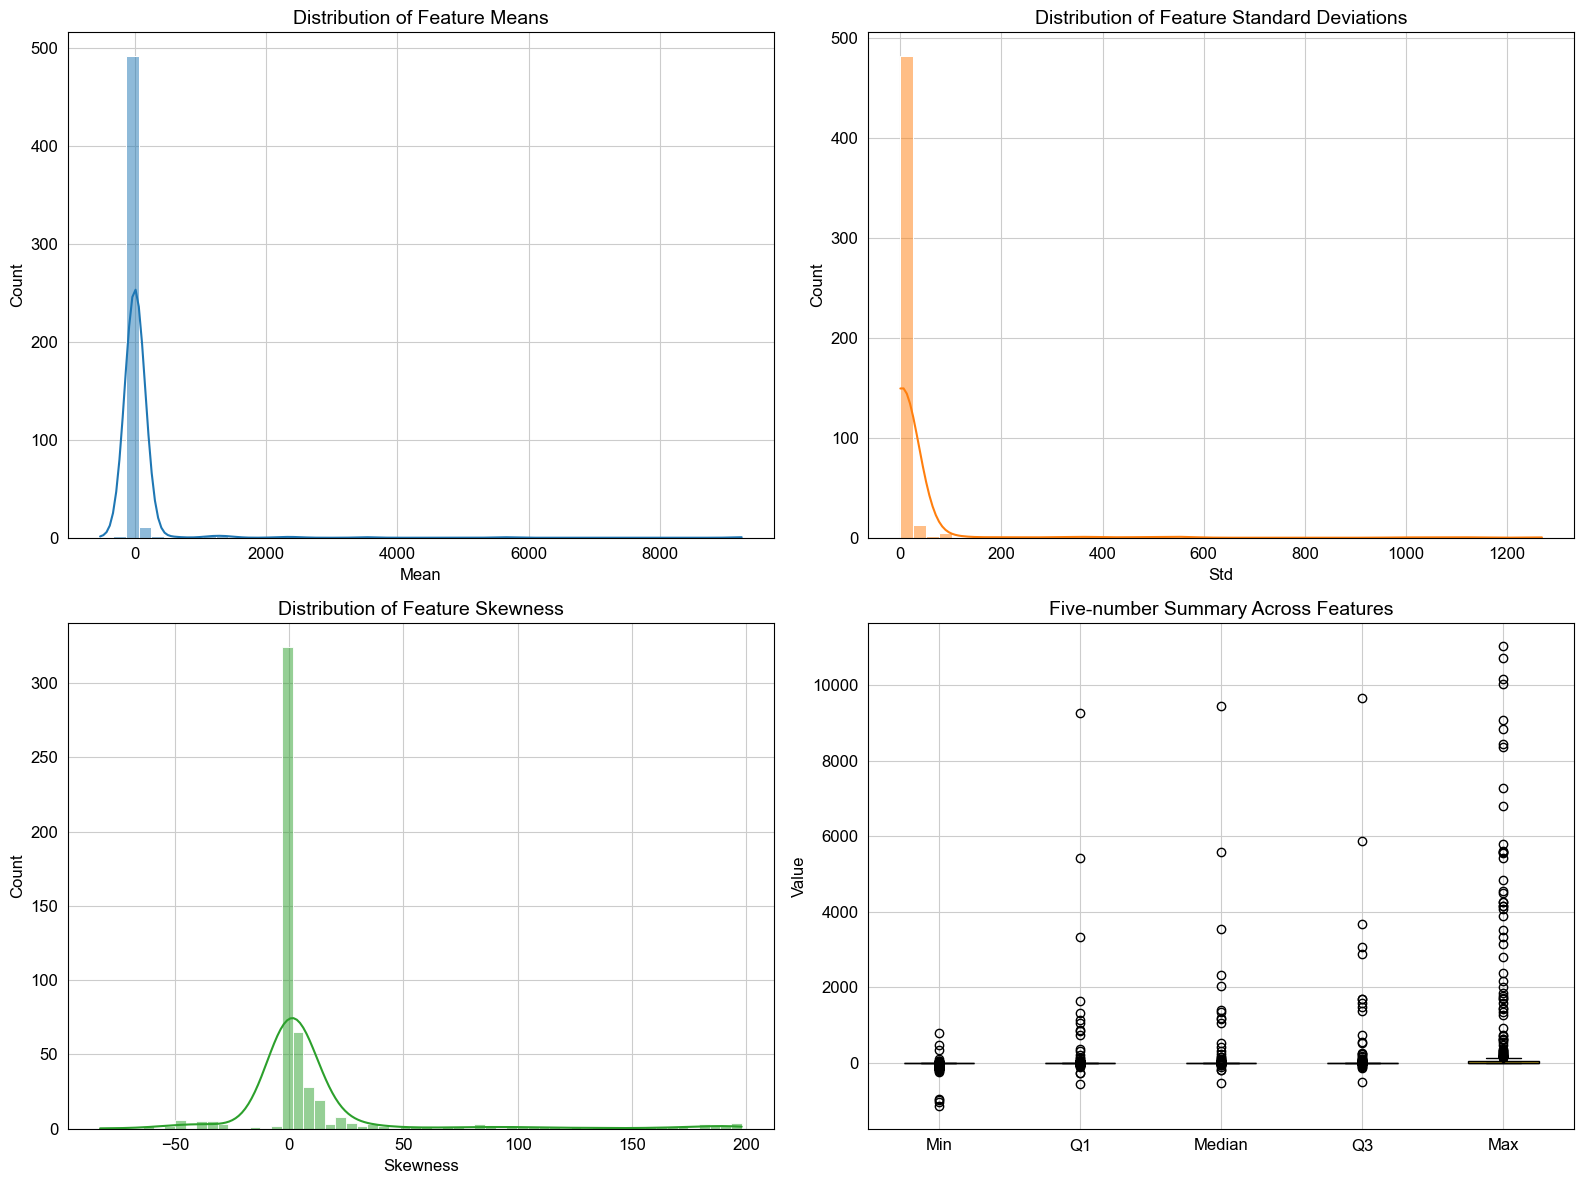

In [4]:
import seaborn as sns
import matplotlib as mpl
from IPython.display import display

sns.set_style('whitegrid')
mpl.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'text.color': 'black',
    'font.size': 12
})

# Convert feature names to readable strings (handles tuples)
feature_labels = [
    '_'.join(map(str, name)) if isinstance(name, (list, tuple)) else str(name)
    for name in feature_names
]

# Per-feature statistics (each is length n_features)
means = np.mean(X, axis=0)
medians = np.median(X, axis=0)
stds = np.std(X, axis=0)
skewnesses = stats.skew(X, axis=0)
mins = np.min(X, axis=0)
q1 = np.percentile(X, 25, axis=0)
medians_q = np.percentile(X, 50, axis=0)
q3 = np.percentile(X, 75, axis=0)
maxs = np.max(X, axis=0)

# Create a DataFrame summarising per-feature stats
feature_stats = pd.DataFrame({
    'feature': feature_labels,
    'mean': means,
    'std': stds,
    'median': medians,
    'skewness': skewnesses,
    'min': mins,
    'q1': q1,
    'q3': q3,
    'max': maxs
})
feature_stats = feature_stats.set_index('feature')

# Display high-level info and a sample of the table
print("Feature Statistics (per feature):")
print(f"Number of features: {feature_stats.shape[0]}")
pd.set_option('display.max_rows', 12)
display(feature_stats.head(12))  # show a few rows for inspection

# Save to CSV for offline inspection
# feature_stats.to_csv('feature_stats_per_feature.csv')

# Professional plotting: distributions of key summary metrics across features
fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='white')

# Distribution of means
ax = axes[0,0]
sns.histplot(feature_stats['mean'], bins=50, kde=True, color='C0', ax=ax)
ax.set_title('Distribution of Feature Means', fontsize=14, color='black')
ax.set_xlabel('Mean', color='black')
ax.set_ylabel('Count', color='black')
ax.tick_params(colors='black')

# Distribution of standard deviations
ax = axes[0,1]
sns.histplot(feature_stats['std'], bins=50, kde=True, color='C1', ax=ax)
ax.set_title('Distribution of Feature Standard Deviations', fontsize=14, color='black')
ax.set_xlabel('Std', color='black')
ax.set_ylabel('Count', color='black')
ax.tick_params(colors='black')

# Distribution of skewness
ax = axes[1,0]
sns.histplot(feature_stats['skewness'], bins=60, kde=True, color='C2', ax=ax)
ax.set_title('Distribution of Feature Skewness', fontsize=14, color='black')
ax.set_xlabel('Skewness', color='black')
ax.set_ylabel('Count', color='black')
ax.tick_params(colors='black')

# Boxplot: five-number-summary across features (shows spread of each summary stat)
ax = axes[1,1]
box_data = [feature_stats['min'], feature_stats['q1'], feature_stats['median'], feature_stats['q3'], feature_stats['max']]
bp = ax.boxplot(box_data, labels=['Min', 'Q1', 'Median', 'Q3', 'Max'], patch_artist=True)
# Color boxes for readability
colors = ['#8da0cb', '#66c2a5', '#fc8d62', '#a6d854', '#ffd92f']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
# Style whiskers/medians
for element in ['whiskers','caps','medians','fliers']:
    plt.setp(bp[element], color='black')
ax.set_title('Five-number Summary Across Features', fontsize=14, color='black')
ax.set_ylabel('Value', color='black')
ax.tick_params(colors='black')

plt.tight_layout()
plt.show()

# Correlation Matrix

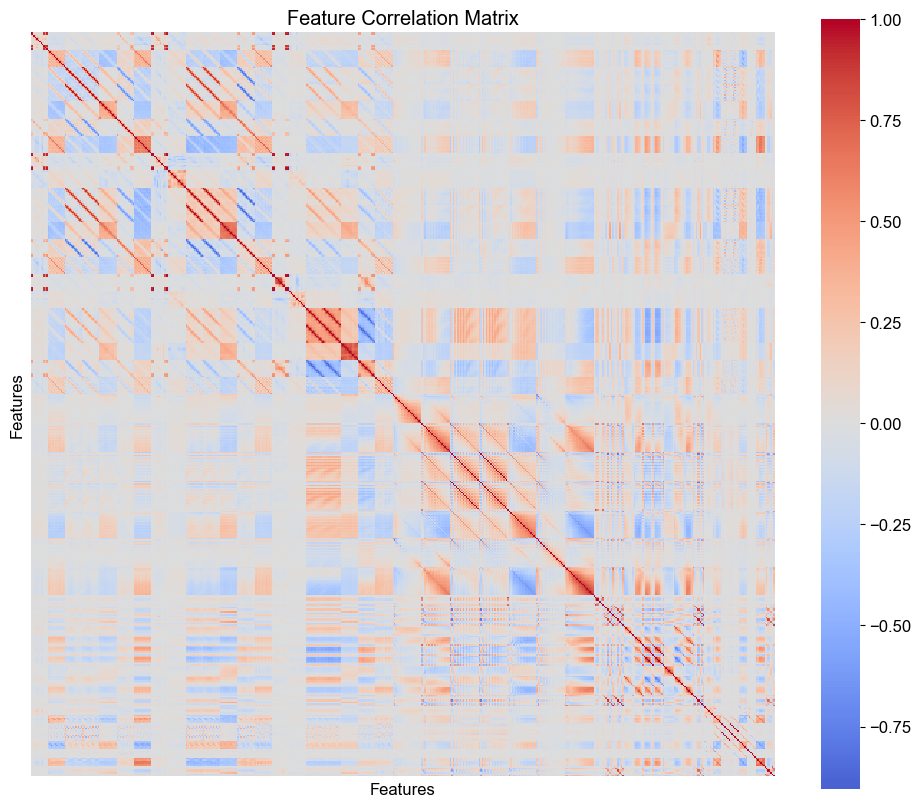

Correlation Matrix Statistics:
Average absolute correlation: 0.108
Maximum absolute correlation: 0.996
Minimum absolute correlation: 0.000

Number of highly correlated feature pairs (|corr| > 0.8): 356
Top 10 highly correlated pairs (by absolute correlation):
  Features 94 (chroma_cqt_kurtosis_11) and 95 (chroma_cqt_kurtosis_12): 0.996
  Features 299 (mfcc_mean_08) and 319 (mfcc_median_08): 0.995
  Features 301 (mfcc_mean_10) and 321 (mfcc_median_10): 0.995
  Features 429 (spectral_contrast_mean_03) and 436 (spectral_contrast_median_03): 0.995
  Features 300 (mfcc_mean_09) and 320 (mfcc_median_09): 0.995
  Features 177 (chroma_stft_kurtosis_10) and 178 (chroma_stft_kurtosis_11): 0.995
  Features 427 (spectral_contrast_mean_01) and 434 (spectral_contrast_median_01): 0.994
  Features 303 (mfcc_mean_12) and 323 (mfcc_median_12): 0.994
  Features 428 (spectral_contrast_mean_02) and 435 (spectral_contrast_median_02): 0.994
  Features 169 (chroma_stft_kurtosis_02) and 179 (chroma_stft_kurtos

[(np.int64(0),
  np.int64(1),
  'chroma_cens_kurtosis_01',
  'chroma_cens_kurtosis_02',
  np.float64(0.9548278576516459)),
 (np.int64(0),
  np.int64(9),
  'chroma_cens_kurtosis_01',
  'chroma_cens_kurtosis_10',
  np.float64(0.8792684613445095)),
 (np.int64(0),
  np.int64(11),
  'chroma_cens_kurtosis_01',
  'chroma_cens_kurtosis_12',
  np.float64(0.9353162694716859)),
 (np.int64(0),
  np.int64(84),
  'chroma_cens_kurtosis_01',
  'chroma_cqt_kurtosis_01',
  np.float64(0.9437064923654644)),
 (np.int64(0),
  np.int64(85),
  'chroma_cens_kurtosis_01',
  'chroma_cqt_kurtosis_02',
  np.float64(0.9561557999018324)),
 (np.int64(0),
  np.int64(93),
  'chroma_cens_kurtosis_01',
  'chroma_cqt_kurtosis_10',
  np.float64(0.8173332298001043)),
 (np.int64(0),
  np.int64(94),
  'chroma_cens_kurtosis_01',
  'chroma_cqt_kurtosis_11',
  np.float64(0.953036358163388)),
 (np.int64(0),
  np.int64(95),
  'chroma_cens_kurtosis_01',
  'chroma_cqt_kurtosis_12',
  np.float64(0.9581265938838625)),
 (np.int64(0),
 

In [5]:
# Compute correlation matrix
corr_matrix = np.corrcoef(X.T)

# Create readable feature labels (handles tuple names)
feature_labels = ['_'.join(map(str, name)) if isinstance(name, (list, tuple)) else str(name) for name in feature_names]

# Plot correlation matrix heatmap (omit ticklabels for large feature sets)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True,
            xticklabels=False, yticklabels=False)
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# Print some statistics about correlations
print('Correlation Matrix Statistics:' )
upper_tri_idx = np.triu_indices_from(corr_matrix, k=1)
upper_tri = corr_matrix[upper_tri_idx]
print(f'Average absolute correlation: {np.mean(np.abs(upper_tri)):.3f}')
print(f'Maximum absolute correlation: {np.max(np.abs(upper_tri)):.3f}')
print(f'Minimum absolute correlation: {np.min(np.abs(upper_tri)):.3f}')

# Find highly correlated feature pairs (using the upper-triangle mapping)
threshold = 0.8
high_mask = np.abs(upper_tri) > threshold
high_positions = np.where(high_mask)[0]  # indices into upper_tri
high_corr_pairs = [(upper_tri_idx[0][k], upper_tri_idx[1][k], upper_tri[k]) for k in high_positions]

# Map indices to human-readable feature names
high_corr_named = [(i, j, feature_labels[i], feature_labels[j], corr) for (i, j, corr) in high_corr_pairs]

print(f'\nNumber of highly correlated feature pairs (|corr| > {threshold}): {len(high_corr_named)}')
if high_corr_named:
    print('Top 10 highly correlated pairs (by absolute correlation):')
    sorted_named = sorted(high_corr_named, key=lambda x: abs(x[4]), reverse=True)[:10]
    for i, j, name_i, name_j, corr in sorted_named:
        si = name_i if len(name_i) <= 80 else (name_i[:77] + '...')
        sj = name_j if len(name_j) <= 80 else (name_j[:77] + '...')
        print(f'  Features {i} ({si}) and {j} ({sj}): {corr:.3f}')

# Return the named list as cell output for further inspection
high_corr_named

We'd expect these to be highly correlatedsince they are part of the same feature "group"

# PCA Analysis

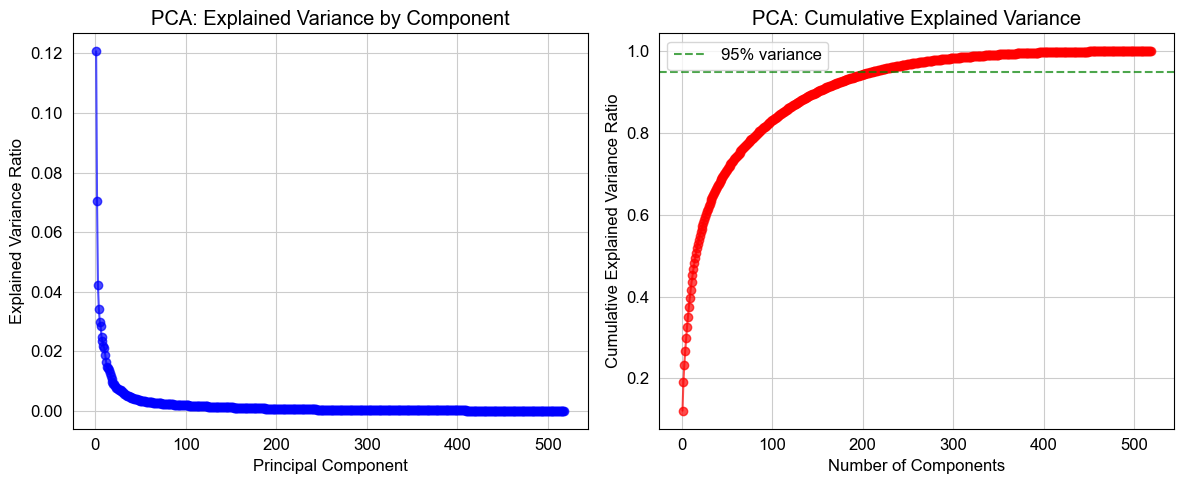

Number of components needed for 95% variance: 211
Variance explained by first component: 0.121
Variance explained by first 10 components: 0.417


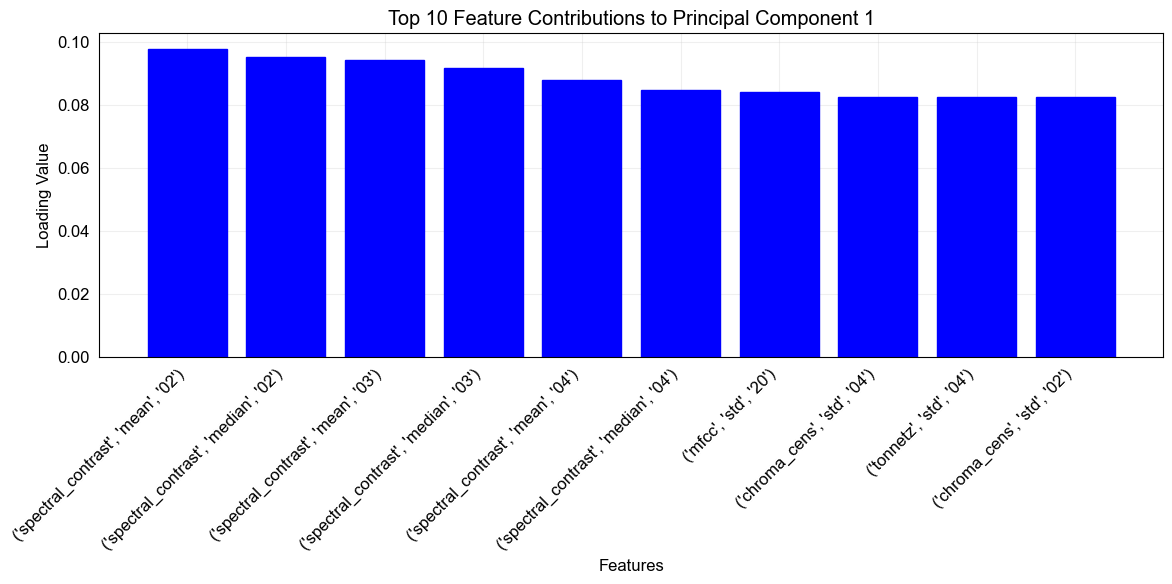

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Perform PCA
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot scree plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', alpha=0.7)
plt.title('PCA: Explained Variance by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', alpha=0.7)
plt.title('PCA: Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='g', linestyle='--', alpha=0.7, label='95% variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of components needed for 95% variance: {n_components_95}")
print(f"Variance explained by first component: {explained_variance[0]:.3f}")
print(f"Variance explained by first 10 components: {cumulative_variance[9]:.3f}")

# Feature contributions to first principal component
loadings_pc1 = pca.components_[0]
abs_loadings = np.abs(loadings_pc1)
top_features_idx = np.argsort(abs_loadings)[-10:][::-1]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_features_idx)), loadings_pc1[top_features_idx])
plt.xticks(range(len(top_features_idx)), 
           [feature_names[i] if i < len(feature_names) else f'Feature_{i}' for i in top_features_idx], 
           rotation=45, ha='right')
plt.title('Top 10 Feature Contributions to Principal Component 1')
plt.xlabel('Features')
plt.ylabel('Loading Value')
plt.grid(True, alpha=0.3)

# Color bars based on positive/negative loading
for bar, loading in zip(bars, loadings_pc1[top_features_idx]):
    bar.set_color('red' if loading < 0 else 'blue')

plt.tight_layout()
plt.show()

PCA Visualization Explanation:
- The scree plot shows the explained variance ratio for each principal component.
- The cumulative plot shows how much total variance is captured by the first N components.
- The bar plot displays the top 10 features with the highest absolute loadings on PC1,
  indicating their contribution to the direction of maximum variance in the data.
- Positive loadings (blue) mean the feature increases as the component score increases,
  while negative loadings (red) mean the feature decreases.
- This helps identify which features are most influential in the principal directions of variation.